# Supplementary file 10: VISUALIZING RELATIONSHIPS IN LoFtool DATASET 
Visualizing relationships for variables in the loftool dataset 

Input: df_loftool.csv 
Output: Several images

References that I learned from: 
[1] https://mode.com/example-gallery/python_histogram/
[2] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
""" 

Observations (continuous columns): 
- Everything is very right skewed
- If allele frequency columns are very right skewed, and LoFtool (pathogenicity) has more entries for lower pathogenicity scores (meaning more lower values) => then that means that lower frequency is correlated with lower pathogenicity?
- Idea: winsorize all right skewed columns and then run the machine learning model and compare non-winsorized => bad idea, discard
- especially because cDNA, CDS, and Protein position were all excluded features from the machine learning model 
 
Observation #2: 
- comparing df_orig, df_cleaned and df_caddphred confirms that mean enoding did not distort the distribution of variables 

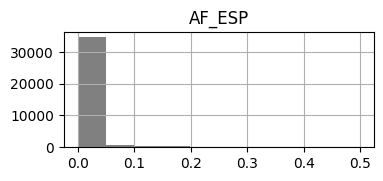

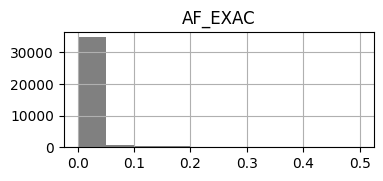

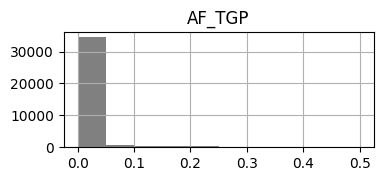

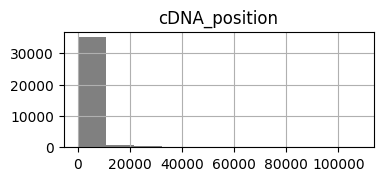

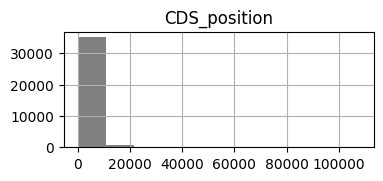

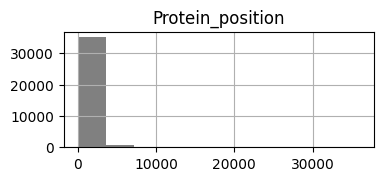

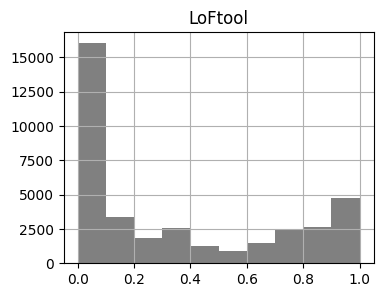

In [40]:
#making histograms for all variables 
import pandas as pd 
import matplotlib.pyplot as plt
df_loftool = pd.read_csv('loftool_full.csv') 

columns = ['AF_ESP', 'AF_EXAC', 'AF_TGP', 'cDNA_position', 'CDS_position', 'Protein_position'] 
#MC, Feature, Codons not used because too many categories
for column in columns:
    df_loftool.hist(column = column, figsize = (4,1.5), color = 'grey')
    plt.savefig(f'hist_loftool_{column}.png', dpi=800, bbox_inches = 'tight')
    plt.show()
    plt.close()

columns = ['LoFtool'] 
#MC, Feature, Codons not used because too many categories
for column in columns:
    df_loftool.hist(column = column, figsize = (4,3), color = 'grey')
    plt.savefig(f'hist_loftool_{column}.png', dpi=800, bbox_inches = 'tight')
    plt.show()
    plt.close()

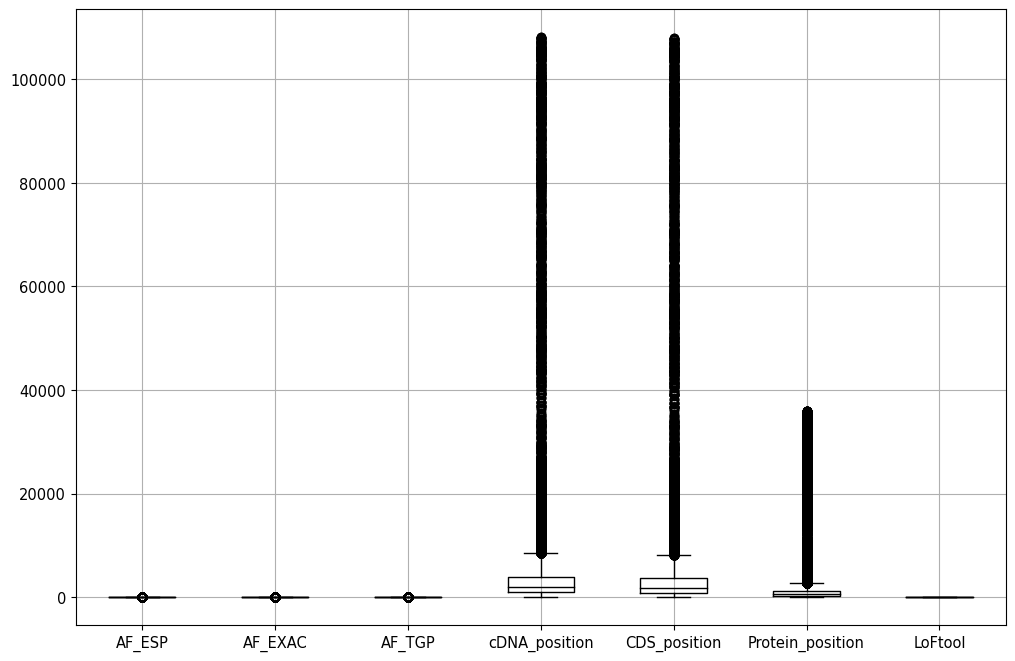

In [20]:
fig, axis = plt.subplots(figsize = (12,8)) 
df_loftool.boxplot(column = continous_variables, figsize = (12,8), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 10.5) 
plt.savefig('loftool_boxplots.png', dpi = 800, bbox_inches = 'tight')

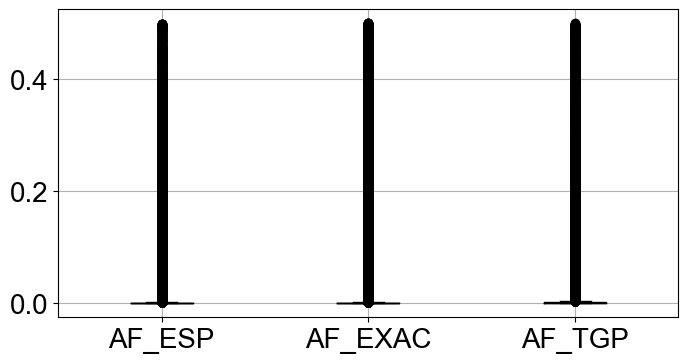

In [30]:
small_scale = ['AF_ESP', 'AF_EXAC', 'AF_TGP'] 
fig, axis = plt.subplots(figsize = (8,4)) 
df_loftool.boxplot(column = small_scale, figsize = (8,4), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('loftool_af_boxplots.png', dpi = 800, bbox_inches = 'tight')

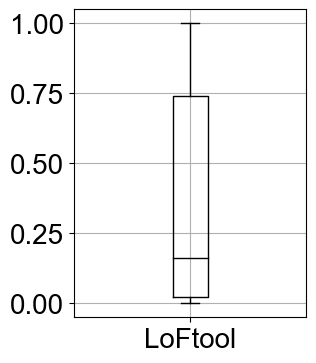

In [35]:
regular = ['LoFtool'] 
fig, axis = plt.subplots(figsize = (3,4)) 
df_loftool.boxplot(column = regular, color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('loftool_boxplots.png', dpi = 800, bbox_inches = 'tight')

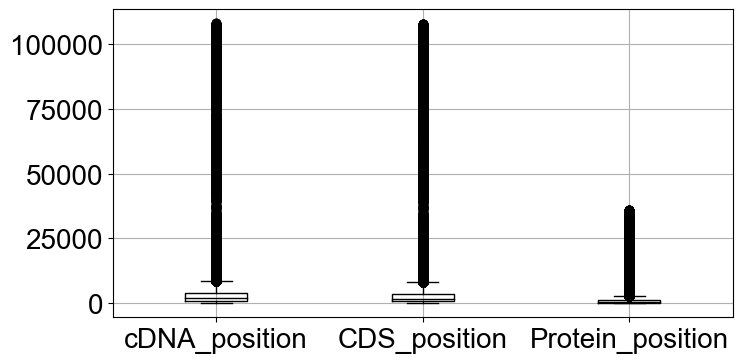

In [32]:
small_scale = ['cDNA_position', 'CDS_position', 'Protein_position'] 
fig, axis = plt.subplots(figsize = (8,4)) 
df_loftool.boxplot(column = small_scale, ax = axis , figsize = (8,4), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 20) 
plt.savefig('loftool_ccc_boxplots.png', dpi = 800, bbox_inches = 'tight')

# correlation matrices 
Resources I learned from; 
[1] https://datatofish.com/correlation-matrix-pandas/
[2] https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/#:~:text=Here's%20what%20the%20syntax%20looks%20like%3A&text=We've%20added%20one%20new,and%20height%20of%20the%20plot.

#same code was run in pycharm and fiure was saved as Fig1.png 

import seaborn as sn 
import matplotlib.pyplot as plt 

corr_loftool_untransformed = df_loftool.corr()
print("Untransformed, mean encoded and imputed caddphred dataset:", corr_loftool_untransformed)
sn.heatmap(corr_loftool_untransformed, annot = True) 
plt.figure(figsize=(20,20))
plt.show()

Observations: 
- cDNA_position, CDS_position, Protein_position, correlated with POS (these are all columns that didn't work in the machine learning model for caddphred => also correlated with POS are EXON , Feature, SYMBOL, CHROM, LoFtool
- AF_ESP, AF_EXAC, AF_TGP all highly correlated with each other => makes sense, how it should be 
- cDNA_position, CDS_position, Protein_position all highly correlated with each other => makes sense => all these positions are linked biologically
- cDNA position, CDS_position, Protein_position all correlated with LoFtool and CHROM 
- cDNA position, CDS_position and SYMBOL, Feature, EXON, POS all correlated which makes sense (positions linked biologically) 
- LoFtool highly correlated with EXON, Feature, SYMBOL, Protein_position, CDS_position, cDNA_position, POS => interesting, these all have to do with gene position
- CHROM correlated with Feature, SYMBOL, EXON => makes sense, location on chromosome determines gene and Feature 
- REF, ALT correlated with Amino_acids, Codons => makes sense, change in genome, change in codons, change in amino acids 
- MC, IMPACT and Amino_acids, Codons correlated => makes snese, change in amino acids/codons affects the protein 
makes sense cuz it's all genes positions and stuff 
- SYMBOL correlated with Exon and Feature 
- Feature and EXON corrleted 

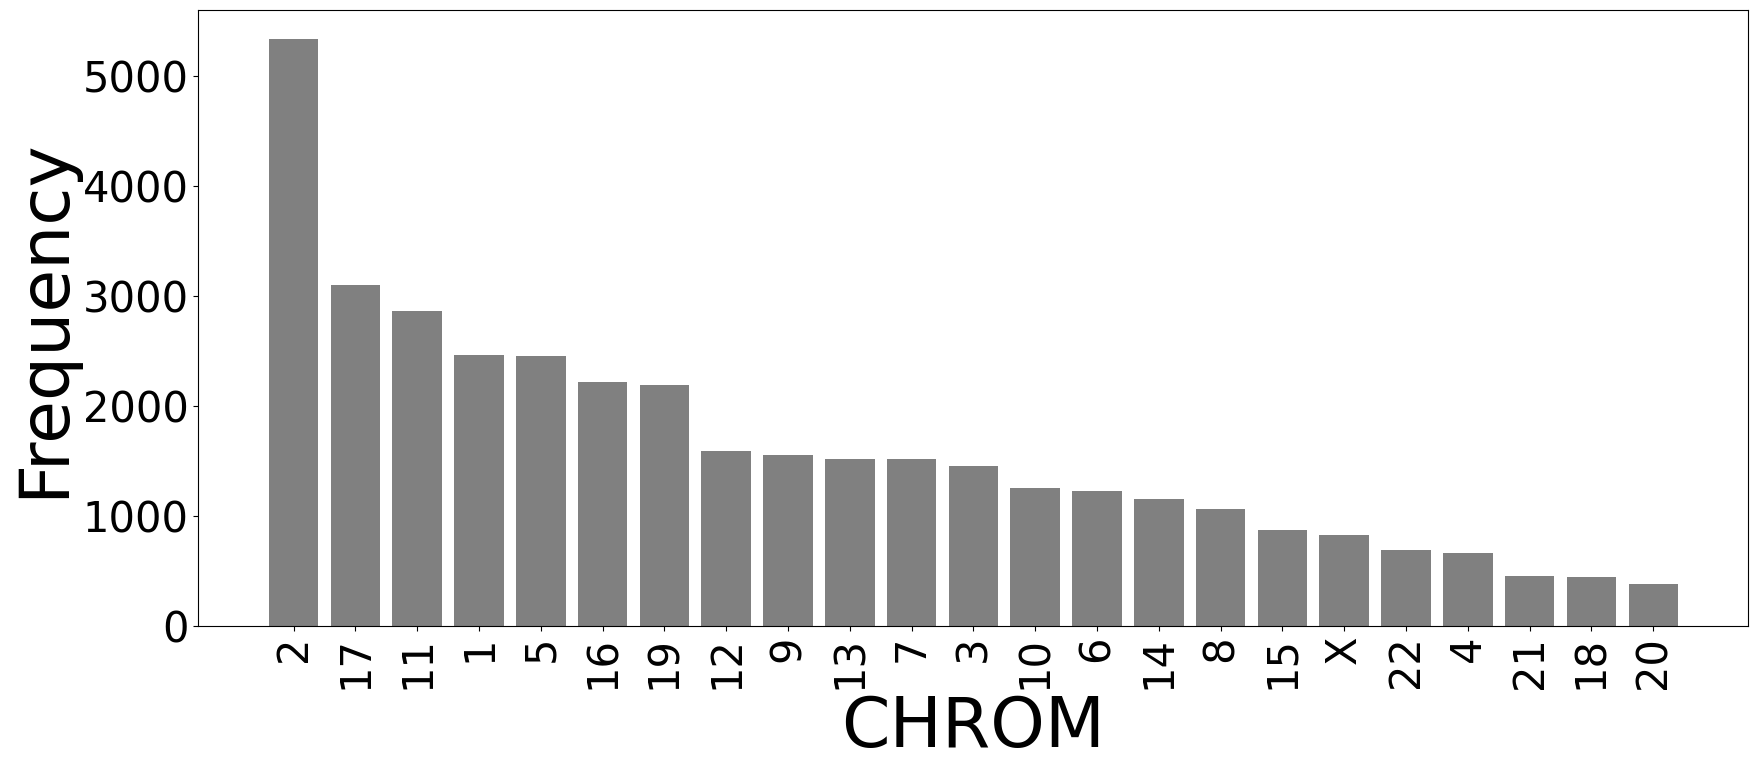

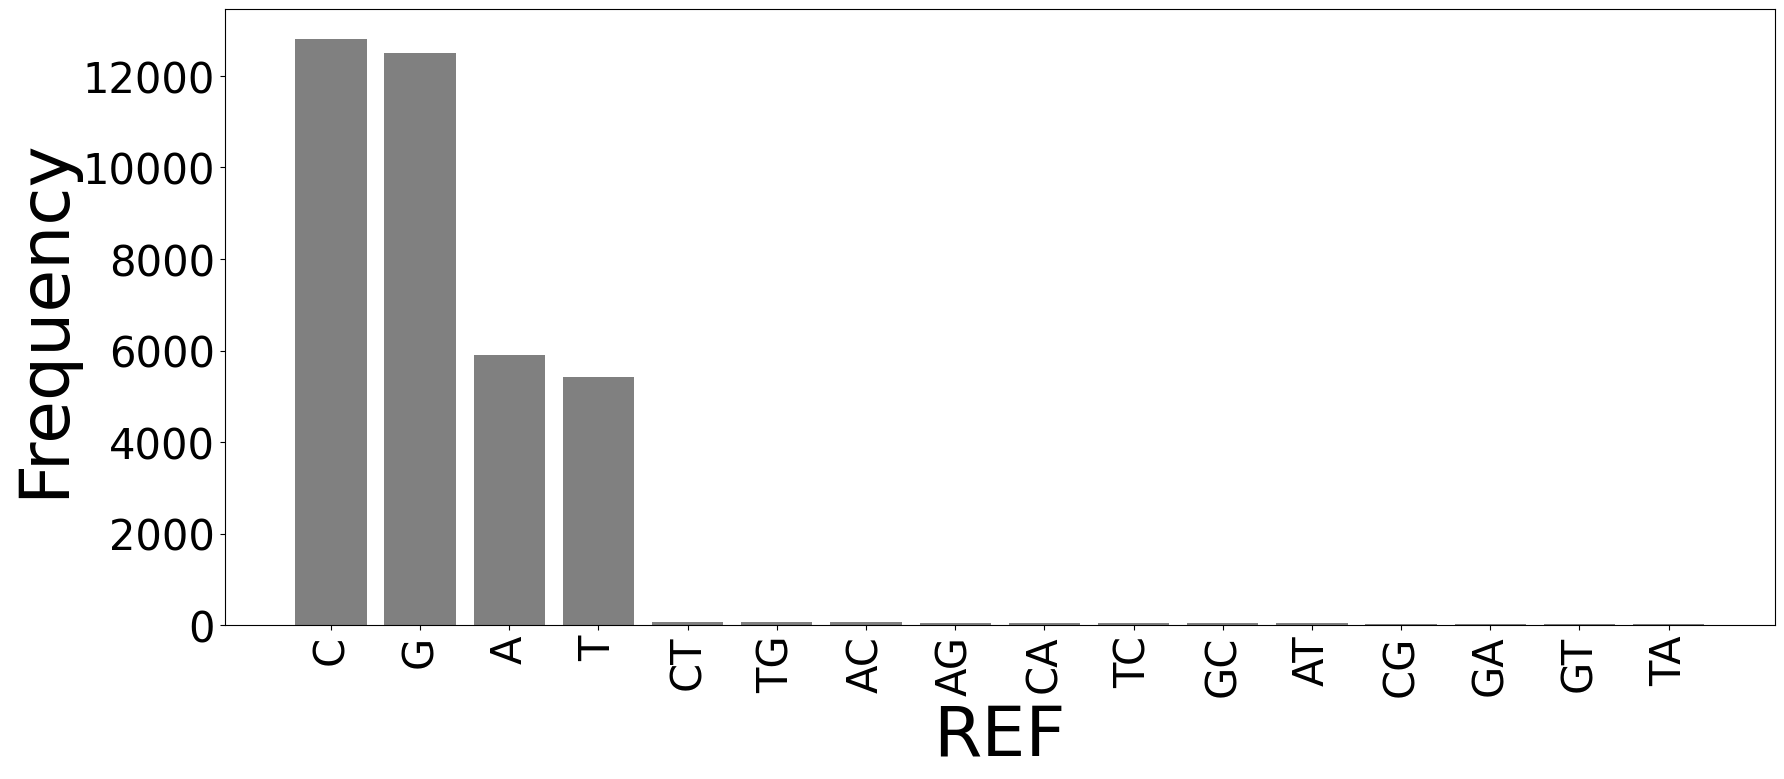

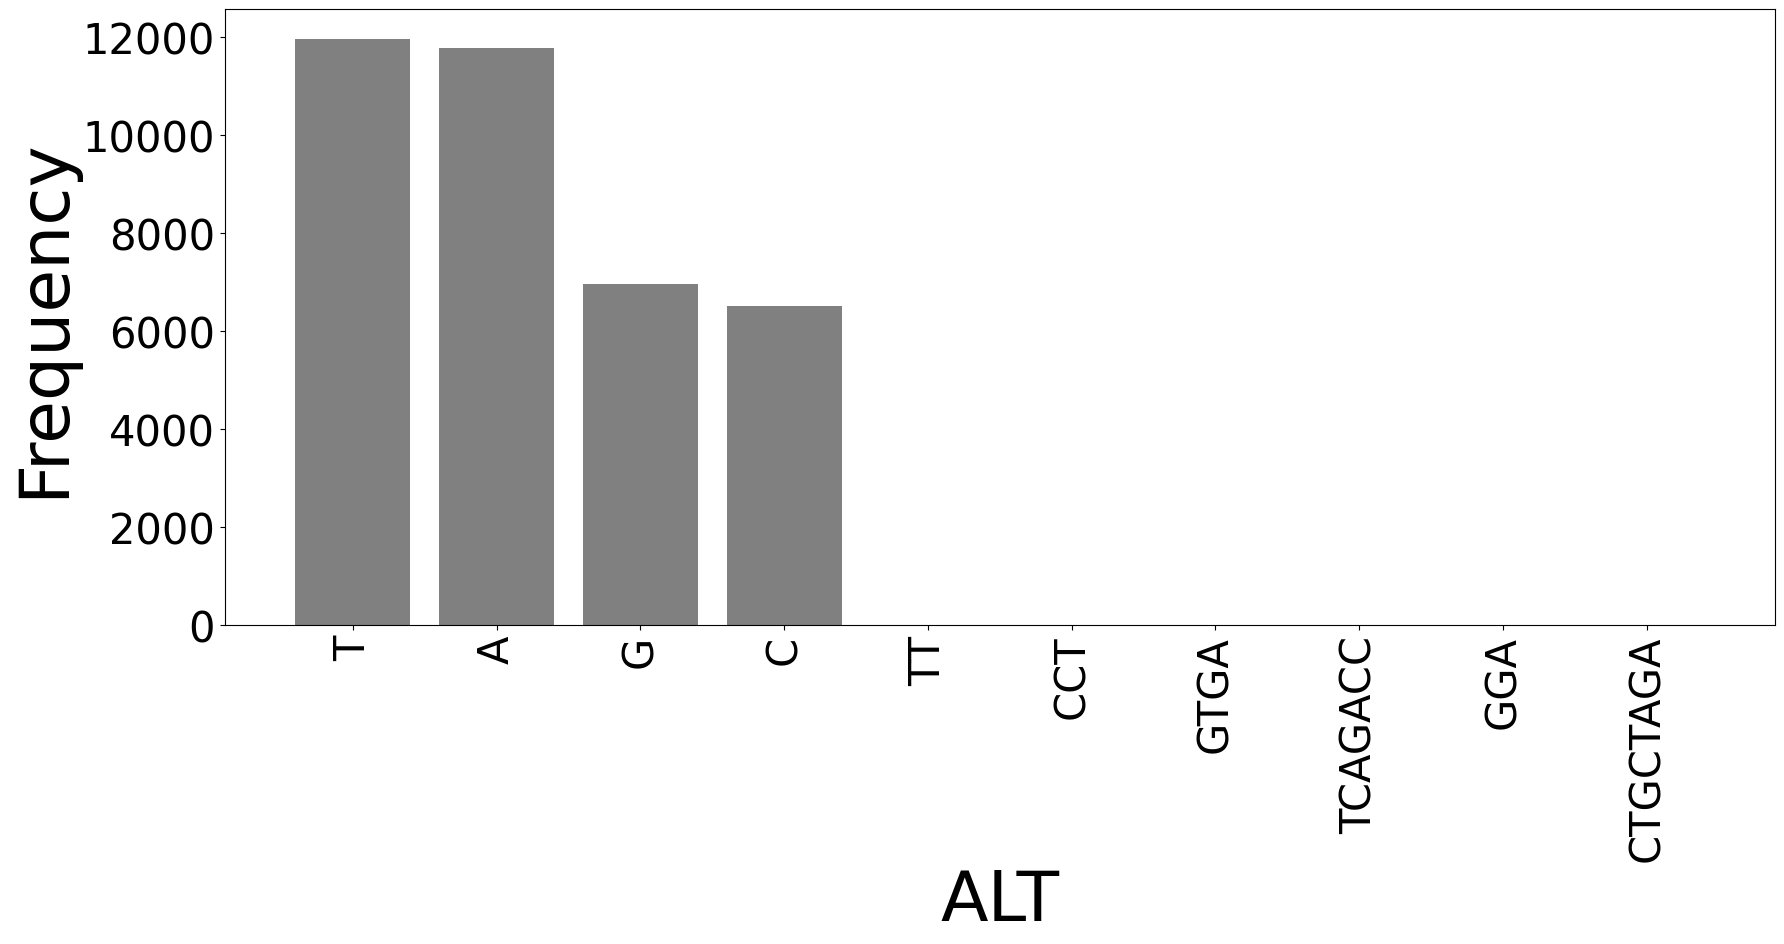

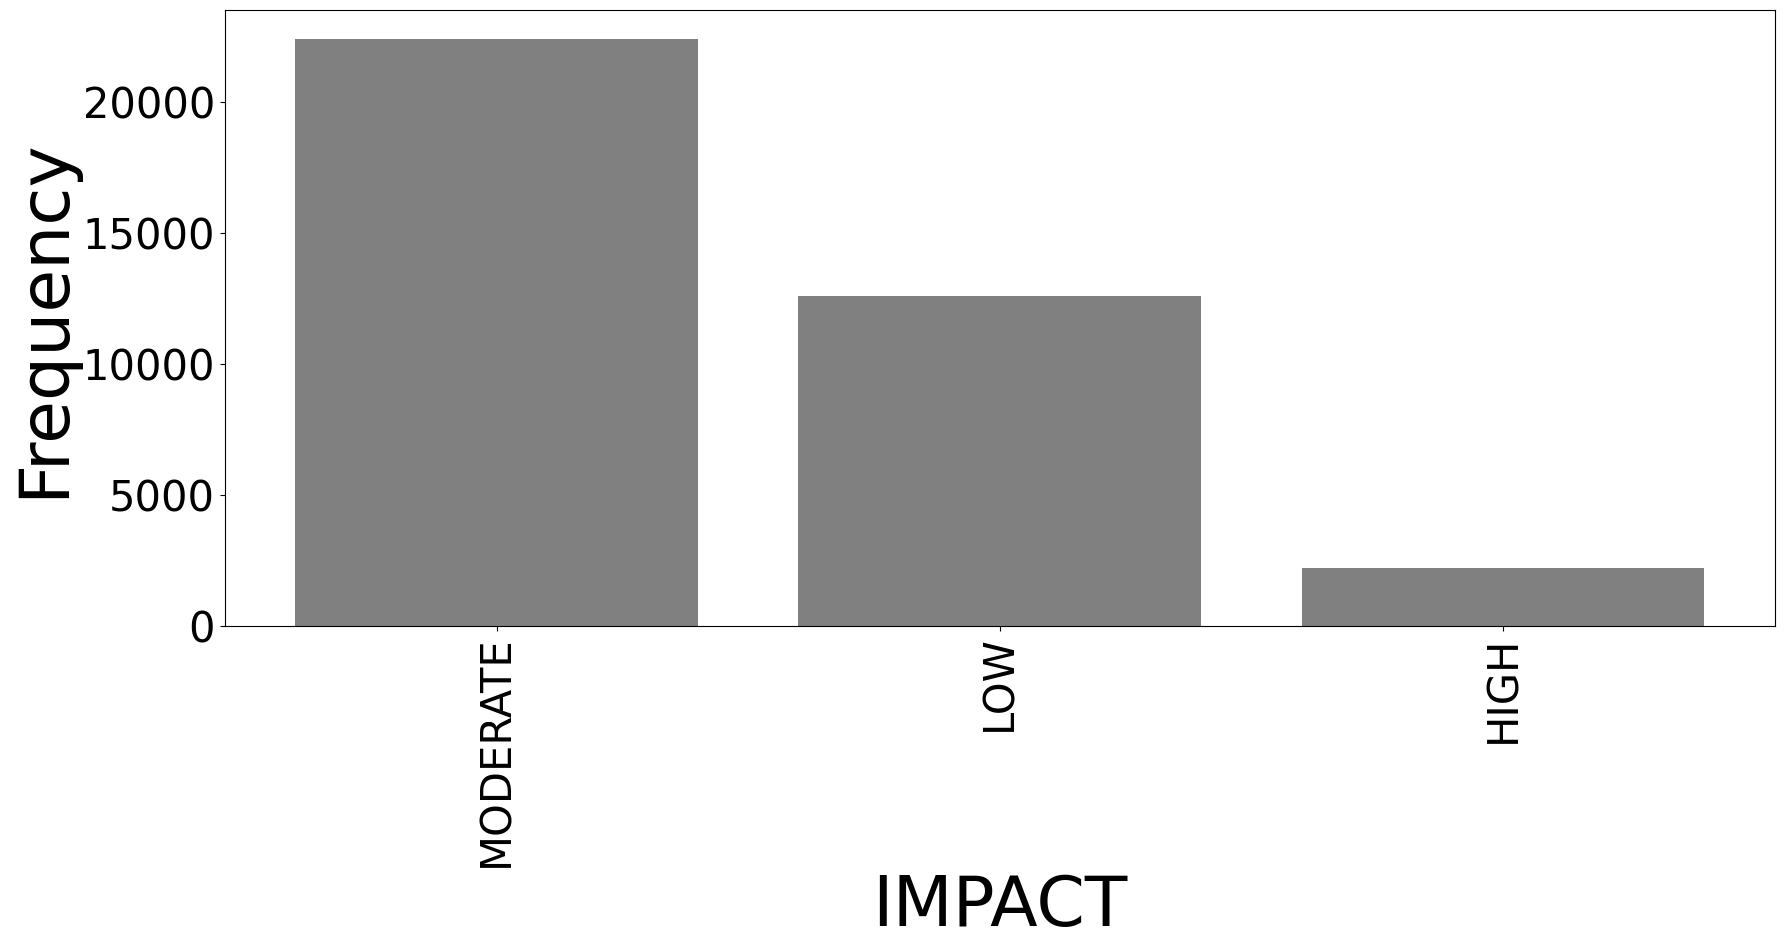

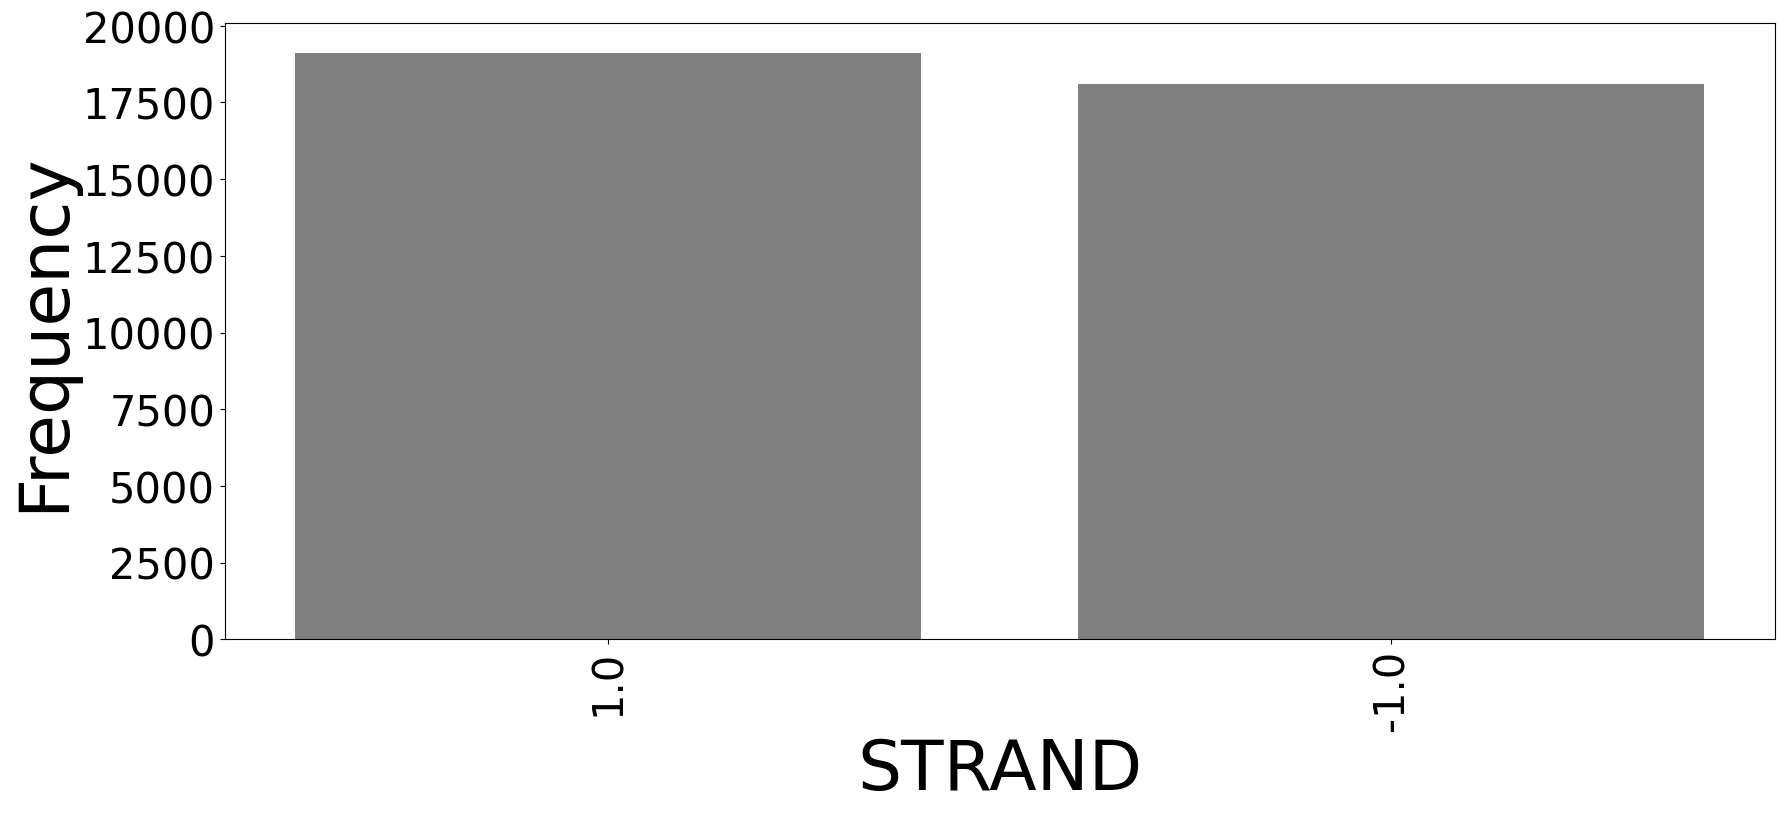

In [42]:
#making bar charts 
#learned some from here; https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
#asked for advice from chatgpt
import pandas as pd 
from matplotlib import pyplot as plt 

df_loftool = pd.read_csv('loftool_full.csv') 

#making bar charts 
#learned some from here; https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
#asked for advice from chatgpt 

import pandas as pd 
from matplotlib import pyplot as plt 

columns = ['CHROM', 'REF', 'ALT', 'IMPACT', 'STRAND']

#MC, Feature, Codons not used because too many categories
for column in columns:
    counts = df_loftool[column].value_counts()
    plt.figure(figsize = (20,8))
    plt.bar(counts.index.astype(str), counts.values, color = 'grey')
    plt.xticks(counts.index.astype(str), labels=counts.index.astype(str), rotation=90) 
    plt.xlabel(column, fontsize = 50) 
    plt.ylabel("Frequency", fontsize = 50) 
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize = 30) 
    plt.savefig(f'bar_chart_loftool_{column}.png', dpi = 800, bbox_inches = 'tight')
    plt.show()
    plt.close()

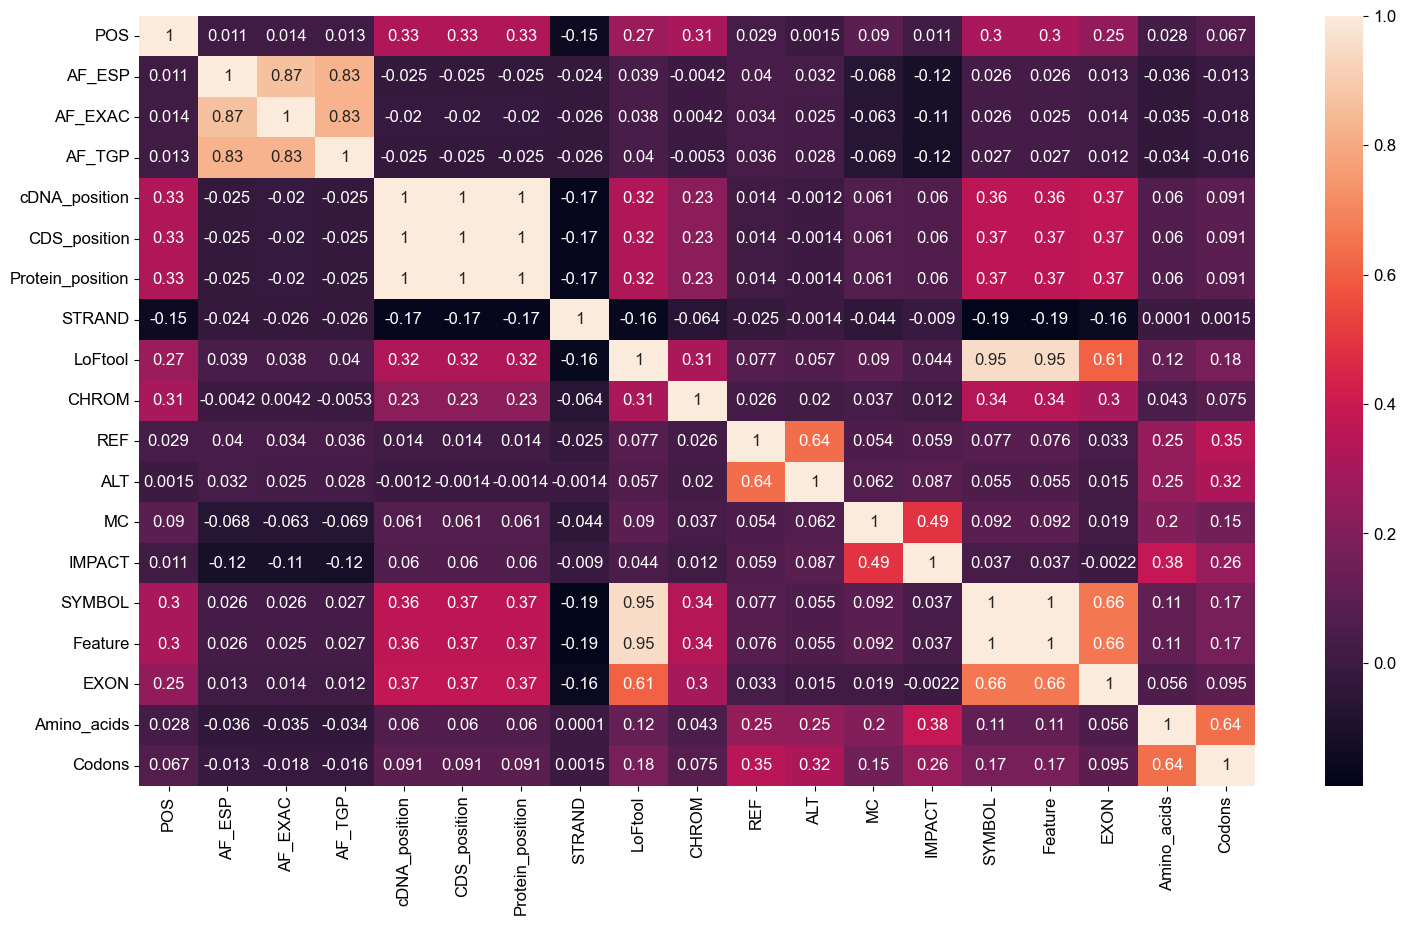

In [29]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Load the dataset
df_loftool = pd.read_csv('df_loftool.csv')

plt.rcParams['font.family'] = 'Arial' 
plt.rcParams['font.size'] = 12

corr_loftool_untransformed = df_loftool.corr(method='pearson')
plt.figure(figsize=(18, 10))
sn.heatmap(corr_loftool_untransformed, annot=True)
plt.savefig('corr.png', dpi=800, bbox_inches='tight')
plt.show()